In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = "data/predictions/eval_results/"

assert(os.path.isdir(DATA_DIR) and "eval_results dir expected")

In [7]:
results = {}

for p_file in os.listdir(DATA_DIR):
    if not p_file.endswith(".csv"): continue
    model_name = p_file.split("_")[3]
    results[model_name] = pd.read_csv(f"{DATA_DIR}/{p_file}")

In [8]:
print("Models evaluated:", results.keys())

Models evaluated: dict_keys(['gemma', 'gemmaqat', 'aya'])


In [9]:
attributes_cz = ["metric_bert_score_P_cz", "metric_bert_score_R_cz", "metric_bert_score_F1_cz"]
attributes_en = ["metric_bert_score_P_en", "metric_bert_score_R_en", "metric_bert_score_F1_en"]

In [130]:
def plot_attributes(attributes, ylim, barwidth, savepath=None):
    grouped_measurements = {attr: [results[model][attr].mean() for model in results.keys()] for attr in attributes}
    
    x = np.arange(len(results))
    multiplier = 0
    
    plt.figure(figsize=(10, 6))
    plt.grid(zorder=1)
    
    for attr, measurements in grouped_measurements.items():
        offset = barwidth * multiplier
        rects = plt.bar(x + offset, measurements, barwidth, label=attr, zorder=3)
        plt.bar_label(rects, padding=3)
        multiplier += 1
        
    plt.title('LLMs Bert Scores')
    plt.xticks(x + barwidth, results.keys())
    
    plt.ylim(ylim)
    plt.legend()

    if savepath != None:
        plt.savefig(savepath)
    
    plt.show()

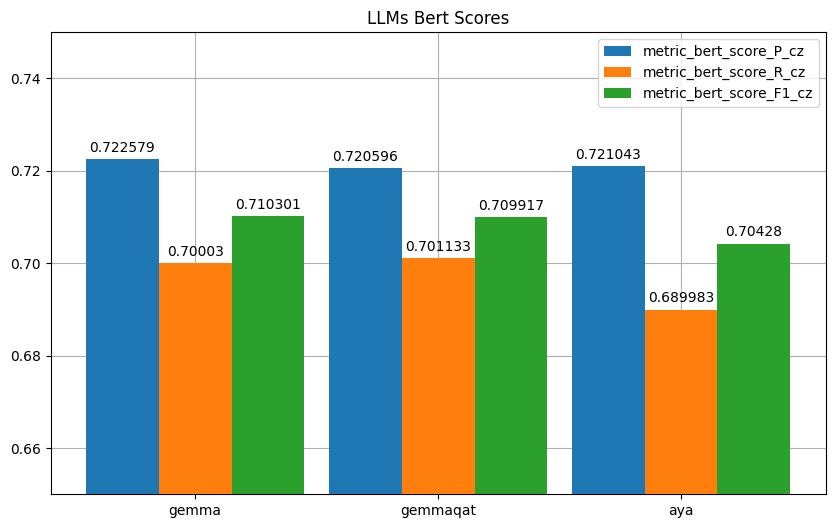

In [133]:
plot_attributes(attributes_cz, ylim=(0.65, 0.75), barwidth=0.3, savepath=None)

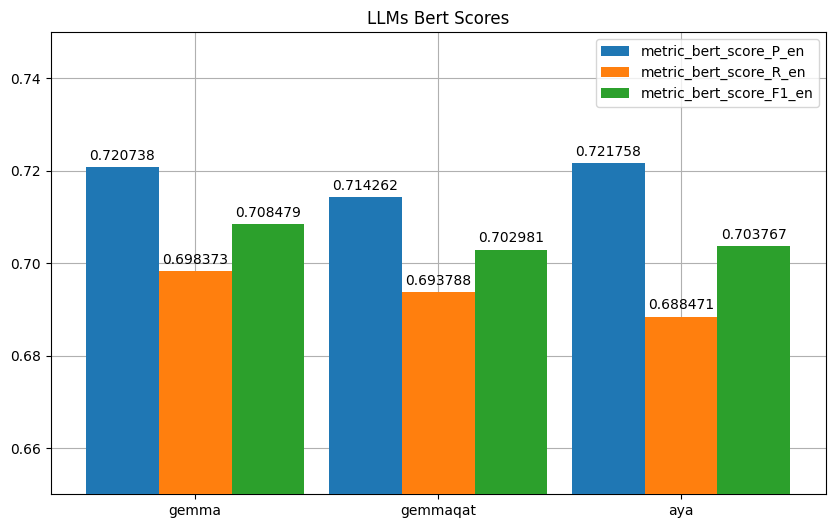

In [134]:
plot_attributes(attributes_en, ylim=(0.65, 0.75), barwidth=0.3, savepath=None)